In [222]:
!pip install -q matplotlib numpy nest

In [224]:
import nest
import numpy as np
import matplotlib.pyplot as plt

In [226]:
nest.set_verbosity("M_WARNING")

# Experiment 1

In [229]:
def experiment(v_leak):
    # Simulation zurücksetzen
    nest.ResetKernel()
    
    # Neuron erstellen
    neuron = nest.Create("iaf_psc_alpha")

    # Aufzeichnungsgerät hinzufügen
    voltmeter = nest.Create("voltmeter")
    nest.Connect(voltmeter, neuron)

    # Simulation ausführen
    nest.Simulate(200.0)

    # Ergebnisse abrufen und visualisieren
    events = nest.GetStatus(voltmeter, "events")[0]
    times = events["times"]
    voltages = events["V_m"]

    plt.figure()
    plt.title(f"Experiment 1: Ein stilles Neuron (v_leak={v_leak} mV)")
    plt.plot(times, voltages, color='blue', linewidth=1.5)
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Membranpotential (mV)")
    plt.grid()
    plt.show()


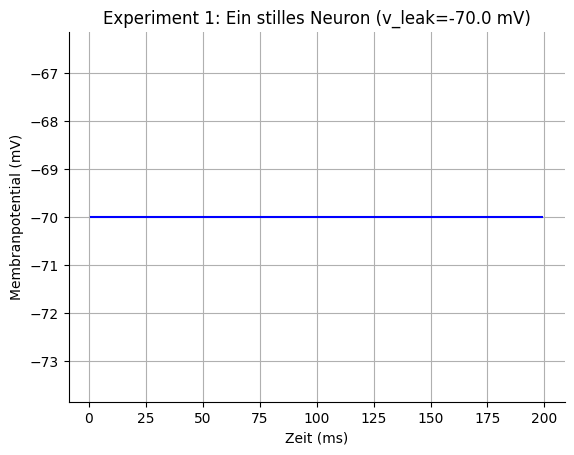

In [231]:
experiment(-70.0)

# Experiment 2

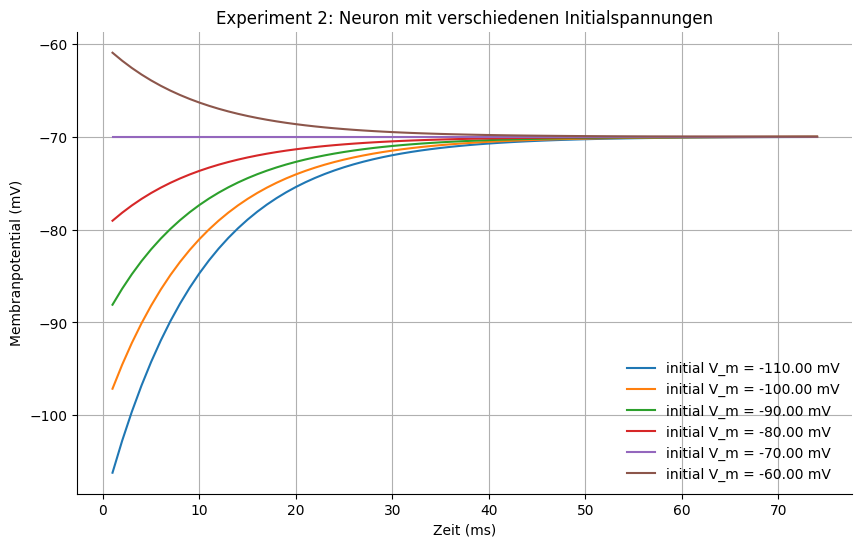

In [234]:
def experiment_leak(v_init_range):
    plt.figure(figsize=(10, 6))
    
    for v_init in v_init_range:
        nest.ResetKernel()

        neuron = nest.Create("iaf_psc_alpha")
        neuron.V_m = v_init

        voltmeter = nest.Create("voltmeter")
        nest.Connect(voltmeter, neuron)

        nest.Simulate(75.0)

        t = voltmeter.get("events", "times")
        v = voltmeter.get("events", "V_m")

        plt.plot(t, v, label=f"initial V_m = {v_init:.2f} mV")

    plt.legend(loc='best')
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Membranpotential (mV)")
    plt.title("Experiment 2: Neuron mit verschiedenen Initialspannungen")
    plt.grid(True)
    plt.show()

# Verwendung der Funktion
v_init_range = np.arange(-110, -50, 10)
experiment_leak(v_init_range)


## Erweiterung Experiment 2 für weitere Initialspannungen (v_leak)

In [237]:
def experiment_leak(v_leak, plot_func=None):
    # Simulation zurücksetzen
    nest.ResetKernel()

    # Neuron erstellen
    neuron = nest.Create("iaf_psc_alpha", params={"E_L": v_leak, "V_th": -55.0, "V_reset": -70.0, "tau_m": 20.0})

    # Aufzeichnungsgerät hinzufügen
    voltmeter = nest.Create("voltmeter")
    nest.Connect(voltmeter, neuron)

    # Simulation ausführen
    nest.Simulate(200.0)

    # Ergebnisse abrufen
    events = nest.GetStatus(voltmeter, "events")[0]
    times = events["times"]
    voltages = events["V_m"]

    plot_func(times, voltages, v_leak)

    return times, voltages


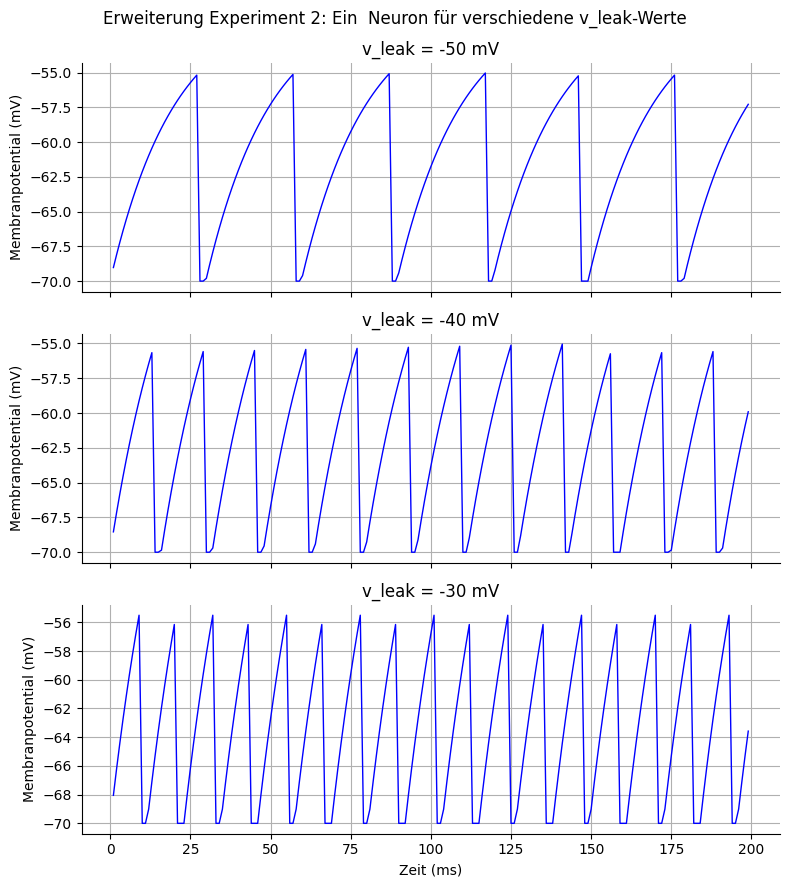

In [239]:
# Liste von v_leak-Werten
v_leak_values = np.arange(-50, -20, 10)

# Subplots für jedes Experiment
fig, axs = plt.subplots(len(v_leak_values), 1, figsize=(8, 3*len(v_leak_values)), sharex=True)
fig.suptitle("Erweiterung Experiment 2: Ein  Neuron für verschiedene v_leak-Werte")

for i, v_leak in enumerate(v_leak_values):
    times, voltages = experiment_leak(v_leak, plot_func=lambda times, voltages, v_leak: axs[i].plot(times, voltages, label=f"v_leak={v_leak} mV", color='blue', linewidth=1))
    axs[i].set_ylabel("Membranpotential (mV)")
    axs[i].set_title(f"v_leak = {v_leak} mV")
    axs[i].grid(True)

axs[-1].set_xlabel("Zeit (ms)")

plt.tight_layout()

plt.show()


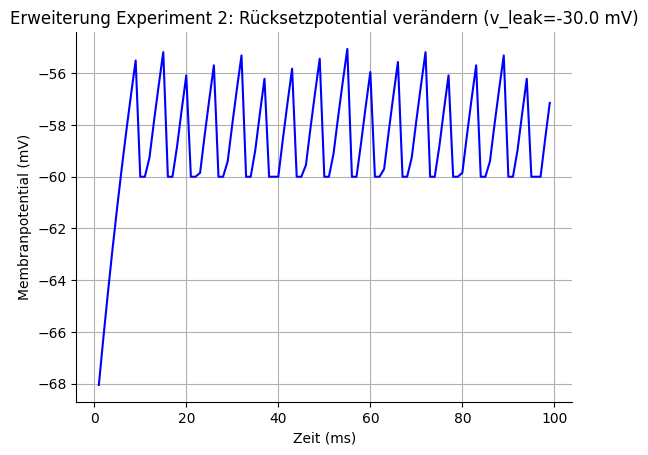

In [241]:
def experiment_leak_reset(v_leak):
    # Simulation zurücksetzen
    nest.ResetKernel()

    # Neuron erstellen
    neuron = nest.Create("iaf_psc_alpha", params={"E_L": v_leak, "V_th": -55.0, "V_reset": -60.0, "tau_m": 20.0})

    # Aufzeichnungsgerät hinzufügen
    voltmeter = nest.Create("voltmeter")
    nest.Connect(voltmeter, neuron)

    # Simulation ausführen
    nest.Simulate(100.0)

    # Ergebnisse abrufen
    events = nest.GetStatus(voltmeter, "events")[0]
    times = events["times"]
    voltages = events["V_m"]

    plt.figure()
    plt.title(f"Erweiterung Experiment 2: Rücksetzpotential verändern (v_leak={v_leak} mV)")
    plt.plot(times, voltages, color='blue', linewidth=1.5)
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Membranpotential (mV)")
    plt.grid()
    plt.show()


experiment_leak_reset(-30.0)

In [243]:
import pandas as pd
import seaborn as sns

# Experiment 3: Testen verschiedener Parameterkombinationen

In [246]:
# Funktion zum Testen der Kombination von Parametern
def experiment3(v_leak, v_threshold, v_reset, i_bias_leak):
    # Simulation zurücksetzen
    nest.ResetKernel()

    # Neuron erstellen
    neuron = nest.Create("iaf_psc_alpha", params={
        "E_L": v_leak,
        "V_th": v_threshold,
        "V_reset": v_reset,
        "I_e": i_bias_leak,
        "tau_m": 20.0
    })

    # Aufzeichnungsgerät hinzufügen
    voltmeter = nest.Create("voltmeter")
    spikedetector = nest.Create("spike_recorder")
    nest.Connect(voltmeter, neuron)
    nest.Connect(neuron, spikedetector)

    # Simulation ausführen
    nest.Simulate(200.0)

    # Ergebnisse abrufen
    events = nest.GetStatus(voltmeter, "events")[0]
    spikes = nest.GetStatus(spikedetector, "events")[0]["times"]

    return len(spikes)


Tabelle der Parameterkombinationen und Anzahl der Spikes:
 Leckpotential (mV)  Schwellenwert (mV)  Bias Leckstrom (pA)  Anzahl der Spikes
              -80.0               -55.0                100.0                0.0
              -80.0               -55.0                300.0                0.0
              -80.0               -55.0                500.0               16.0
              -80.0               -40.0                100.0                0.0
              -80.0               -40.0                300.0                0.0
              -80.0               -40.0                500.0                0.0
              -80.0               -30.0                100.0                0.0
              -80.0               -30.0                300.0                0.0
              -80.0               -30.0                500.0                0.0
              -60.0               -55.0                100.0                6.0
              -60.0               -55.0                300.0 

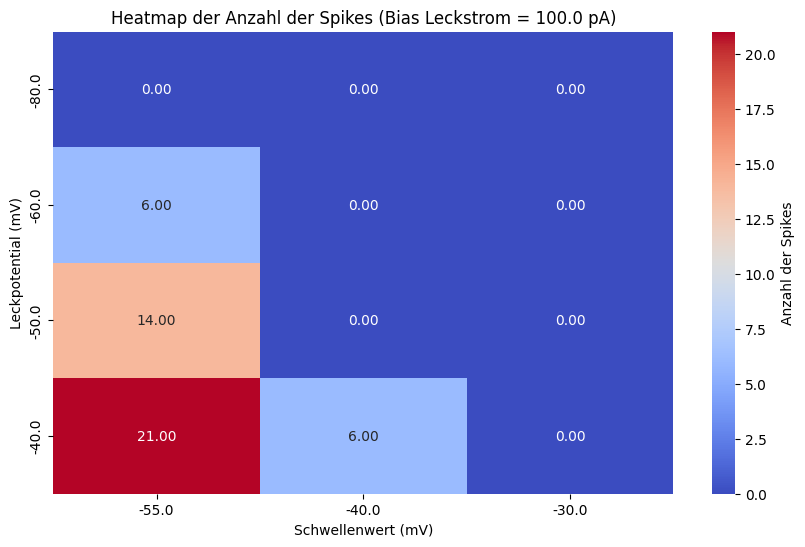

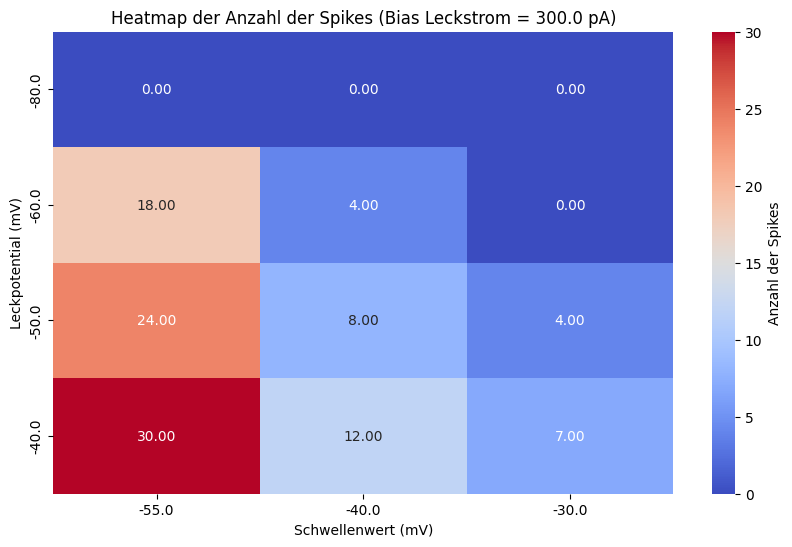

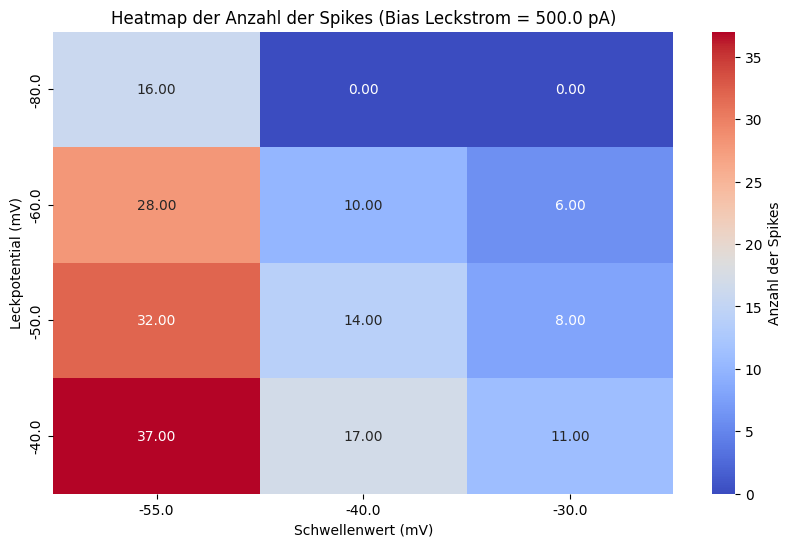

In [248]:
# Erstellen einer Matrix von Parametern
v_leaks = [-80.0, -60.0, -50.0, -40.0]
v_thresholds = [-55.0, -40.0, -30.0]
i_bias_leaks = [100.0, 300.0, 500.0]

# Liste für die Ergebnisse
results = []

# Schleifen über alle Kombinationen von Parametern
for v_leak in v_leaks:
    for v_threshold in v_thresholds:
        for i_bias_leak in i_bias_leaks:
            # Experiment durchführen
            spike_count = experiment3(v_leak, v_threshold, -65.0, i_bias_leak)
            # Parameter und Spikes in die Ergebnisse-Liste speichern
            results.append([v_leak, v_threshold, i_bias_leak, spike_count])

# Erstellen eines Pandas DataFrame aus den Ergebnissen
df = pd.DataFrame(results, columns=["Leckpotential (mV)", "Schwellenwert (mV)", "Bias Leckstrom (pA)", "Anzahl der Spikes"])

# Gruppieren und Aggregieren der Ergebnisse, um doppelte Kombinationen zu vermeiden
df_grouped = df.groupby(["Leckpotential (mV)", "Schwellenwert (mV)", "Bias Leckstrom (pA)"]).agg({"Anzahl der Spikes": "mean"}).reset_index()

# Verbessertes Formatieren und Anzeigen der Tabelle
print("\nTabelle der Parameterkombinationen und Anzahl der Spikes:")
print(df_grouped.to_string(index=False))

# Für jede Kombination des Bias-Leckstroms eine separate Heatmap
for i_bias_leak in i_bias_leaks:
    subset = df_grouped[df_grouped["Bias Leckstrom (pA)"] == i_bias_leak]
    
    # Umwandeln der Tabelle für die Heatmap-Darstellung
    heatmap_data = subset.pivot(index="Leckpotential (mV)", columns="Schwellenwert (mV)", values="Anzahl der Spikes")

    # Heatmap plotten
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Anzahl der Spikes'})
    plt.title(f"Heatmap der Anzahl der Spikes (Bias Leckstrom = {i_bias_leak} pA)")
    plt.xlabel("Schwellenwert (mV)")
    plt.ylabel("Leckpotential (mV)")
    plt.show()

# Experiment 4: Einfluss synaptischer Gewichtungen

In [251]:
import nest
import matplotlib.pyplot as plt

def experiment4(exc_weight, inh_weight, isi, plot_title="Experiment 4: Externe Simulation"):
    nest.ResetKernel()

    # Zielneuron
    neuron = nest.Create("iaf_psc_alpha", params={
        "E_L": -70.0,
        "V_th": -50.0,
        "V_reset": -65.0,
        "tau_m": 20.0
    })

    # Eingabeneuronen (spike generators)
    exc_spikes = nest.Create("spike_generator", 1, params={"spike_times": [10.0, 30.0, 50.0]})
    inh_spikes = nest.Create("spike_generator", 1, params={"spike_times": [20.0, 40.0, 60.0]})

    # Synaptische Verbindungen
    nest.Connect(exc_spikes, neuron, syn_spec={"weight": exc_weight, "delay": 1.0})
    nest.Connect(inh_spikes, neuron, syn_spec={"weight": -inh_weight, "delay": 1.0})

    # Aufzeichnungsgeräte
    voltmeter = nest.Create("voltmeter")
    nest.Connect(voltmeter, neuron)

    # Simulation ausführen
    nest.Simulate(75.0)

    # Visualisierung
    events = nest.GetStatus(voltmeter, "events")[0]
    times = events["times"]
    voltages = events["V_m"]

    plt.figure()
    plt.plot(times, voltages, label="Membranpotential")
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Membranpotential (mV)")
    plt.grid()
    plt.title(plot_title)  # Titel auf den Plot anwenden
    plt.show()


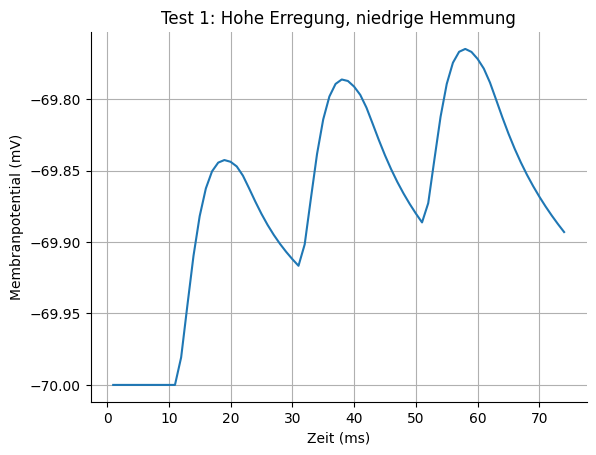

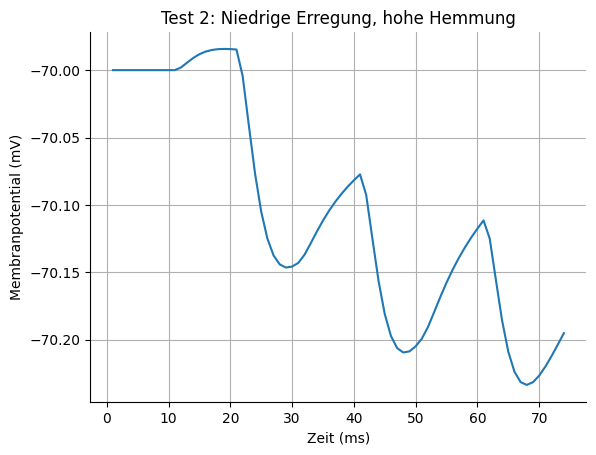

In [253]:
# Test 1: Hohe erregende Gewichtung, niedrige hemmende Gewichtung
experiment4(10.0, 1.0, 20.0, plot_title="Test 1: Hohe Erregung, niedrige Hemmung")

# Test 2: Niedrige erregende Gewichtung, hohe hemmende Gewichtung
experiment4(1.0, 10.0, 20.0, plot_title="Test 2: Niedrige Erregung, hohe Hemmung")